# Practico 2 - Preprocesamiento NLP

Autor: Claudio Collado

## 1.Cargar y visualizar dataset

In [1]:
# Carga el archivo desde el almacenamiento local
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
print("len(uploaded.keys():", len(uploaded.keys()))

for fn in uploaded.keys():
  print('Se subió el archivo "{name}" con longitud {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Obtiene la lista de citas
df_quotes = pd.read_csv(io.StringIO(uploaded['quotes.txt'].decode('utf-8')), sep='\t')
  
# Muestra información de los datos leidos
print("df_quotes:")
print(df_quotes[0:5].to_string())
print(df_quotes.describe())

# Convierte la serie en una lista
corpus = df_quotes['Quote'].tolist()
corpus

Saving quotes.txt to quotes (1).txt
len(uploaded.keys(): 1
Se subió el archivo "quotes.txt" con longitud 6980 bytes
df_quotes:
            Author                                                                                                                                                                                      Quote
0  Agatha Christie  I like living. I have sometimes been wildly, despairingly, acutely miserable, racked with sorrow; but through it all I still know quite certainly that just to be alive is a grand thing.
1  Agatha Christie                                                                                The impossible could not have happened, therefore the impossible must be possible in spite of appearances. 
2  Agatha Christie                                                                                                       Poirot, I said. I have been thinking. An admirable exercise my friend. Continue it. 
3  Agatha Christie                               

['I like living. I have sometimes been wildly, despairingly, acutely miserable, racked with sorrow; but through it all I still know quite certainly that just to be alive is a grand thing.',
 'The impossible could not have happened, therefore the impossible must be possible in spite of appearances. ',
 'Poirot, I said. I have been thinking. An admirable exercise my friend. Continue it. ',
 'Instinct is a marvelous thing. It can neither be explained nor ignored.',
 "The best time for planning a book is while you're doing the dishes. ",
 'You gave too much rein to your imagination. Imagination is a good servant, and a bad master. The simplest explanation is always the most likely.',
 'It is really a hard life. Men will not be nice to you if you are not good-looking, and women will not be nice to you if you are.',
 "Good advice is always certain to be ignored, but that's no reason not to give it. ",
 'The truth, however ugly in itself, is always curious and beautiful to seekers after it.',

## 2. Tokenizacion

In [19]:
#Importo el modulo que voy a utilizar
from sklearn.feature_extraction.text import CountVectorizer

#Instancio el CountVectorizer
vectorizador = CountVectorizer()

#Realizo el fit y transformo el corpus: Obtengo el corpus tokenizado
corpus_tokenizado = vectorizador.fit_transform(corpus)

#Me quedo con el listado de tokens
tokens  = vectorizador.get_feature_names()

In [20]:
#Cantidad de tokens

len(tokens)

459

In [21]:
#Observo los tokens

print(tokens)

['abhor', 'abhorrent', 'able', 'about', 'abstruse', 'accountable', 'acutely', 'adler', 'admirable', 'admirably', 'adventures', 'advice', 'after', 'against', 'akin', 'alive', 'all', 'altogether', 'always', 'am', 'amuse', 'an', 'analysis', 'and', 'another', 'answer', 'any', 'anybody', 'appearances', 'appendix', 'appreciate', 'are', 'arms', 'artificial', 'artist', 'as', 'aside', 'ask', 'assortment', 'at', 'atmosphere', 'attain', 'attention', 'attentions', 'attic', 'awful', 'bad', 'balanced', 'banality', 'bask', 'be', 'bear', 'beautiful', 'been', 'before', 'begins', 'being', 'best', 'bleed', 'blessed', 'book', 'bored', 'brain', 'broken', 'but', 'by', 'can', 'capital', 'careful', 'certain', 'certainly', 'charming', 'choose', 'chosen', 'clever', 'close', 'cold', 'come', 'comes', 'comparison', 'conceive', 'conquer', 'contained', 'continue', 'convenient', 'conversation', 'convinced', 'cordial', 'could', 'coveted', 'crave', 'created', 'crisis', 'cryptogram', 'curious', 'data', 'day', 'dead', 'd

In [22]:
#Obervo el corpus tokenizado en formato de array 

print(corpus_tokenizado.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [23]:
#Obervo el corpus tokenizado en formato de DataFrame (solo a modo informativo)

df = pd.DataFrame(corpus_tokenizado.toarray())
df.columns = tokens
df

,abhor,abhorrent,able,about,abstruse,accountable,acutely,adler,admirable,admirably,adventures,advice,after,against,akin,alive,all,altogether,always,am,amuse,an,analysis,and,another,answer,any,anybody,appearances,appendix,appreciate,are,arms,artificial,artist,as,aside,ask,assortment,at,...,very,wait,was,watson,way,we,wears,weather,were,what,whatever,when,whether,which,while,who,whole,whose,why,wildly,will,wind,wisdom,wish,wished,with,without,woman,women,words,work,workman,world,would,wounds,yawn,yet,you,young,your
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f426f0f8990>,
                    color=None,
                    features=['abhor', 'abhorrent', 'able', 'about', 'abstruse',
                              'accountable', 'acutely', 'adler', 'admirable',
                              'admirably', 'adventures', 'advice', 'after',
                              'against', 'akin', 'alive', 'all', 'altogether',
                              'always', 'am', 'amuse', 'an', 'analysis', 'and',
                              'another', 'answer', 'any', 'anybody',
                              'appearances', 'appendix', ...],
                    n=None, orient='h')

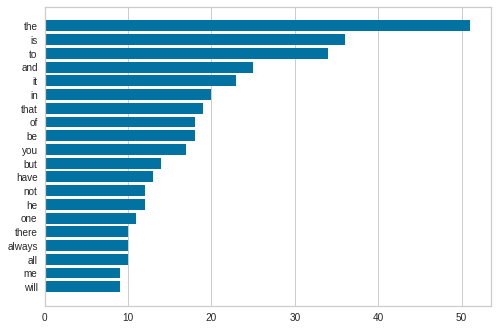

In [24]:
#Utilizo la libreria yellowbrick para visualizar la frecuencia de los tokens

from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=tokens, n=20,orient='h') #Observo los 20 con mayor frecuencia
visualizer.fit(corpus_tokenizado)

Se observa que los tokens mas frecuentes corresponden a stopwords

## 3. Tokenizacion con remocion de stopwords

In [25]:
#Importo el modulo que voy a utilizar
from sklearn.feature_extraction.text import CountVectorizer

#Instancio el CountVectorizer
vectorizador_stopwords = CountVectorizer(stop_words="english") #Como el texto es en ingles seteo el stopword para ese lenguaje

#Realizo el fit y transformo el corpus: Obtengo el corpus tokenizado
corpus_tokenizado_stopwords = vectorizador_stopwords.fit_transform(corpus)

#Me quedo con el listado de tokens
tokens_stopwords  = vectorizador_stopwords.get_feature_names()

In [26]:
#Cantidad de tokens

len(tokens_stopwords)

335

In [27]:
#Observo los tokens

print(tokens_stopwords)

['abhor', 'abhorrent', 'able', 'abstruse', 'accountable', 'acutely', 'adler', 'admirable', 'admirably', 'adventures', 'advice', 'akin', 'alive', 'altogether', 'amuse', 'analysis', 'answer', 'anybody', 'appearances', 'appendix', 'appreciate', 'arms', 'artificial', 'artist', 'aside', 'ask', 'assortment', 'atmosphere', 'attain', 'attention', 'attentions', 'attic', 'awful', 'bad', 'balanced', 'banality', 'bask', 'bear', 'beautiful', 'begins', 'best', 'bleed', 'blessed', 'book', 'bored', 'brain', 'broken', 'capital', 'careful', 'certain', 'certainly', 'charming', 'choose', 'chosen', 'clever', 'close', 'cold', 'come', 'comes', 'comparison', 'conceive', 'conquer', 'contained', 'continue', 'convenient', 'conversation', 'convinced', 'cordial', 'coveted', 'crave', 'created', 'crisis', 'cryptogram', 'curious', 'data', 'day', 'dead', 'deceptive', 'deepest', 'depressing', 'desired', 'despairingly', 'did', 'die', 'died', 'disappointed', 'dishes', 'dispense', 'divided', 'dog', 'doing', 'don', 'doubts

In [28]:
#Obervo el corpus tokenizado en formato de array 

print(corpus_tokenizado_stopwords.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


Se observa una reduccion en la cantidad de tokens debido a la remocion de stopwords.

Observo los tokes mas frecuentes utilizando la libreria yellowbrick

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f426f040d50>,
                    color=None,
                    features=['abhor', 'abhorrent', 'able', 'abstruse',
                              'accountable', 'acutely', 'adler', 'admirable',
                              'admirably', 'adventures', 'advice', 'akin',
                              'alive', 'altogether', 'amuse', 'analysis',
                              'answer', 'anybody', 'appearances', 'appendix',
                              'appreciate', 'arms', 'artificial', 'artist',
                              'aside', 'ask', 'assortment', 'atmosphere',
                              'attain', 'attention', ...],
                    n=None, orient='h')

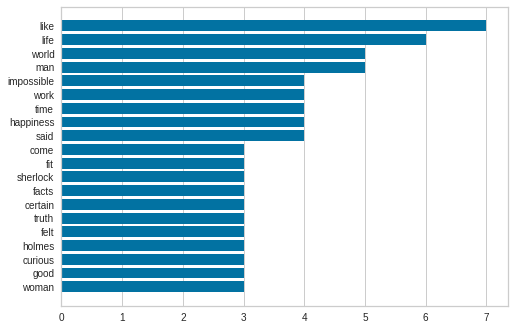

In [29]:
#Utilizo la libreria yellowbrick para visualizar la frecuencia de los tokens

from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=tokens_stopwords, n=20,orient='h') #Observo los 20 con mayor frecuencia
visualizer.fit(corpus_tokenizado_stopwords)

Se observa un cambio notorio en los tokens mas frecuentes ya que no se encuentran los stopwords como en el caso anterior

# 4. Tokenización con remoción de stopwords + stemming con NLTK

In [30]:
#Importo las librerias que voy a utilizar
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer #NLTK

# Creamos el stemmer. Utilizo el Stemmer de Porter
stemmer = PorterStemmer()

# Construimos un analyzer con el preprocesamiento que si provee CountVectorizer
analyzer = CountVectorizer(stop_words='english').build_analyzer()

# Definimos una función que suma el stemming al preprocesamiento que provee el analyzer
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

#Instancio el CountVectorizer
vectorizador = CountVectorizer(analyzer=stemmed_words)

# Aplicamos el CountVectorizer utilizando la función como analyzer: Obtengo el corpus tokenizado
corpus_tokenizado_stopwords_stemming = vectorizador.fit_transform(corpus)

#Me quedo con el listado de tokens
tokens_stopwords_stemming  = vectorizador.get_feature_names()

In [31]:
#Cantidad de tokens

len(tokens_stopwords_stemming)

318

In [32]:
#Observo los tokens

print(tokens_stopwords_stemming)

['abhor', 'abhorr', 'abl', 'abstrus', 'account', 'acut', 'adler', 'admir', 'adventur', 'advic', 'akin', 'aliv', 'altogeth', 'amus', 'analysi', 'answer', 'anybodi', 'appear', 'appendix', 'appreci', 'arm', 'artifici', 'artist', 'asid', 'ask', 'assort', 'atmospher', 'attain', 'attent', 'attic', 'aw', 'bad', 'balanc', 'banal', 'bask', 'bear', 'beauti', 'begin', 'best', 'bleed', 'bless', 'book', 'bore', 'brain', 'broken', 'capit', 'care', 'certain', 'certainli', 'charm', 'choos', 'chosen', 'clever', 'close', 'cold', 'come', 'comparison', 'conceiv', 'conquer', 'contain', 'continu', 'conveni', 'convers', 'convinc', 'cordial', 'covet', 'crave', 'creat', 'crisi', 'cryptogram', 'curiou', 'data', 'day', 'dead', 'decept', 'deepest', 'depress', 'desir', 'despairingli', 'did', 'die', 'disappoint', 'dish', 'dispens', 'divid', 'do', 'dog', 'don', 'doubt', 'dragon', 'draw', 'drink', 'dubiou', 'dull', 'easili', 'eclips', 'elimin', 'emot', 'enemi', 'enjoy', 'enlist', 'everybodi', 'exalt', 'excit', 'exerc

In [33]:
#Obervo el corpus tokenizado en formato de array 

print(corpus_tokenizado_stopwords_stemming.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


Nuevamente se observa una reduccion en la cantidad de tokens debido a la remocion de stopwords + stemming

Observo los tokes mas frecuentes utilizando la libreria yellowbrick

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f426ef88750>,
                    color=None,
                    features=['abhor', 'abhorr', 'abl', 'abstrus', 'account',
                              'acut', 'adler', 'admir', 'adventur', 'advic',
                              'akin', 'aliv', 'altogeth', 'amus', 'analysi',
                              'answer', 'anybodi', 'appear', 'appendix',
                              'appreci', 'arm', 'artifici', 'artist', 'asid',
                              'ask', 'assort', 'atmospher', 'attain', 'attent',
                              'attic', ...],
                    n=None, orient='h')

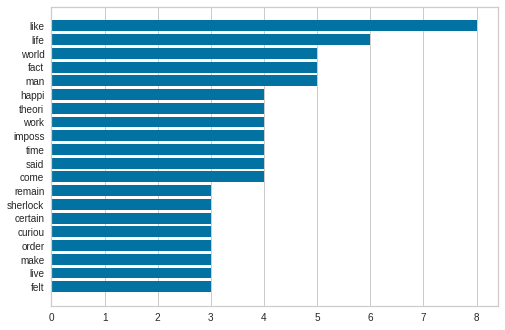

In [34]:
#Utilizo la libreria yellowbrick para visualizar la frecuencia de los tokens

from yellowbrick.text import FreqDistVisualizer
visualizer = FreqDistVisualizer(features=tokens_stopwords_stemming, n=20,orient='h') #Observo los 20 con mayor frecuencia
visualizer.fit(corpus_tokenizado_stopwords_stemming)

# 5. TF-IDF transformer sobre resultado de la tokenización

In [36]:
#Importo las librerias que voy a utilizar
from sklearn.feature_extraction.text import TfidfTransformer

#Instancio el transformador
tfidf_transformer = TfidfTransformer()

# Aplicamos Tf-Idf sobre la matrix de tokens
corpus_tokenizado_stopwords_stemming_tfidf = tfidf_transformer.fit_transform(corpus_tokenizado_stopwords_stemming)

#Obervo el resultado en formato de array 
array_tfidf = corpus_tokenizado_stopwords_stemming_tfidf.toarray()

#Observo el array
array_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45592197,
        0.        ],
       [0.        , 0.14517868, 0.        , ..., 0.        , 0.        ,
        0.        ]])